# Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Analysing Data

In [2]:
df = pd.read_csv("C:/Users/murta/Desktop/New folder/Handwritten-Alphabets-Recognition/A_Z Handwritten Data.csv")

In [3]:
df.shape

(372450, 785)

In [4]:
data_array = np.array(df,dtype=np.uint8)
del df  #memory issues

In [5]:
data_array.shape

(372450, 785)

In [6]:
alpha = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

In [7]:
labels = data_array[:,0]
x = data_array[:,1:].reshape(372450,28,28)/255.
del data_array
unique, counts = np.unique(labels, return_counts=True)
list_alpha = list(zip(alpha, counts))
for i in list_alpha:
    print(i[0],' : ',i[1])

A  :  13869
B  :  8668
C  :  23409
D  :  10134
E  :  11440
F  :  1163
G  :  5762
H  :  7218
I  :  1120
J  :  8493
K  :  5603
L  :  11586
M  :  12336
N  :  19010
O  :  57825
P  :  19341
Q  :  5812
R  :  11566
S  :  48419
T  :  22495
U  :  29008
V  :  4182
W  :  10784
X  :  6272
Y  :  10859
Z  :  6076


<BarContainer object of 26 artists>

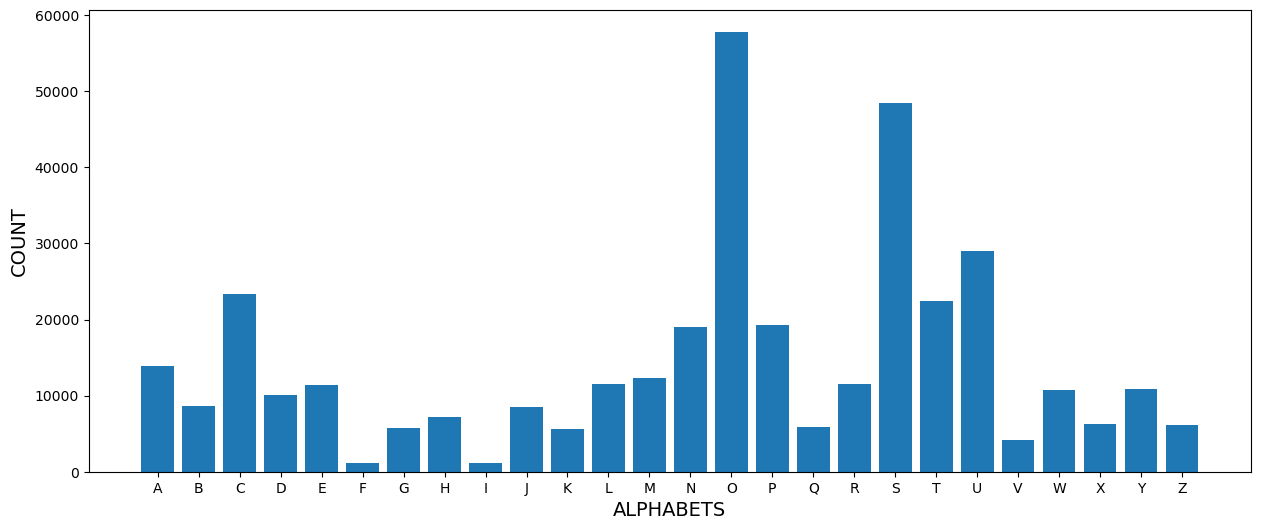

In [8]:
fig=plt.figure(figsize=(15,6))
plt.xlabel('ALPHABETS',fontsize=14)
plt.ylabel('COUNT',fontsize=14)
plt.bar(alpha,counts)

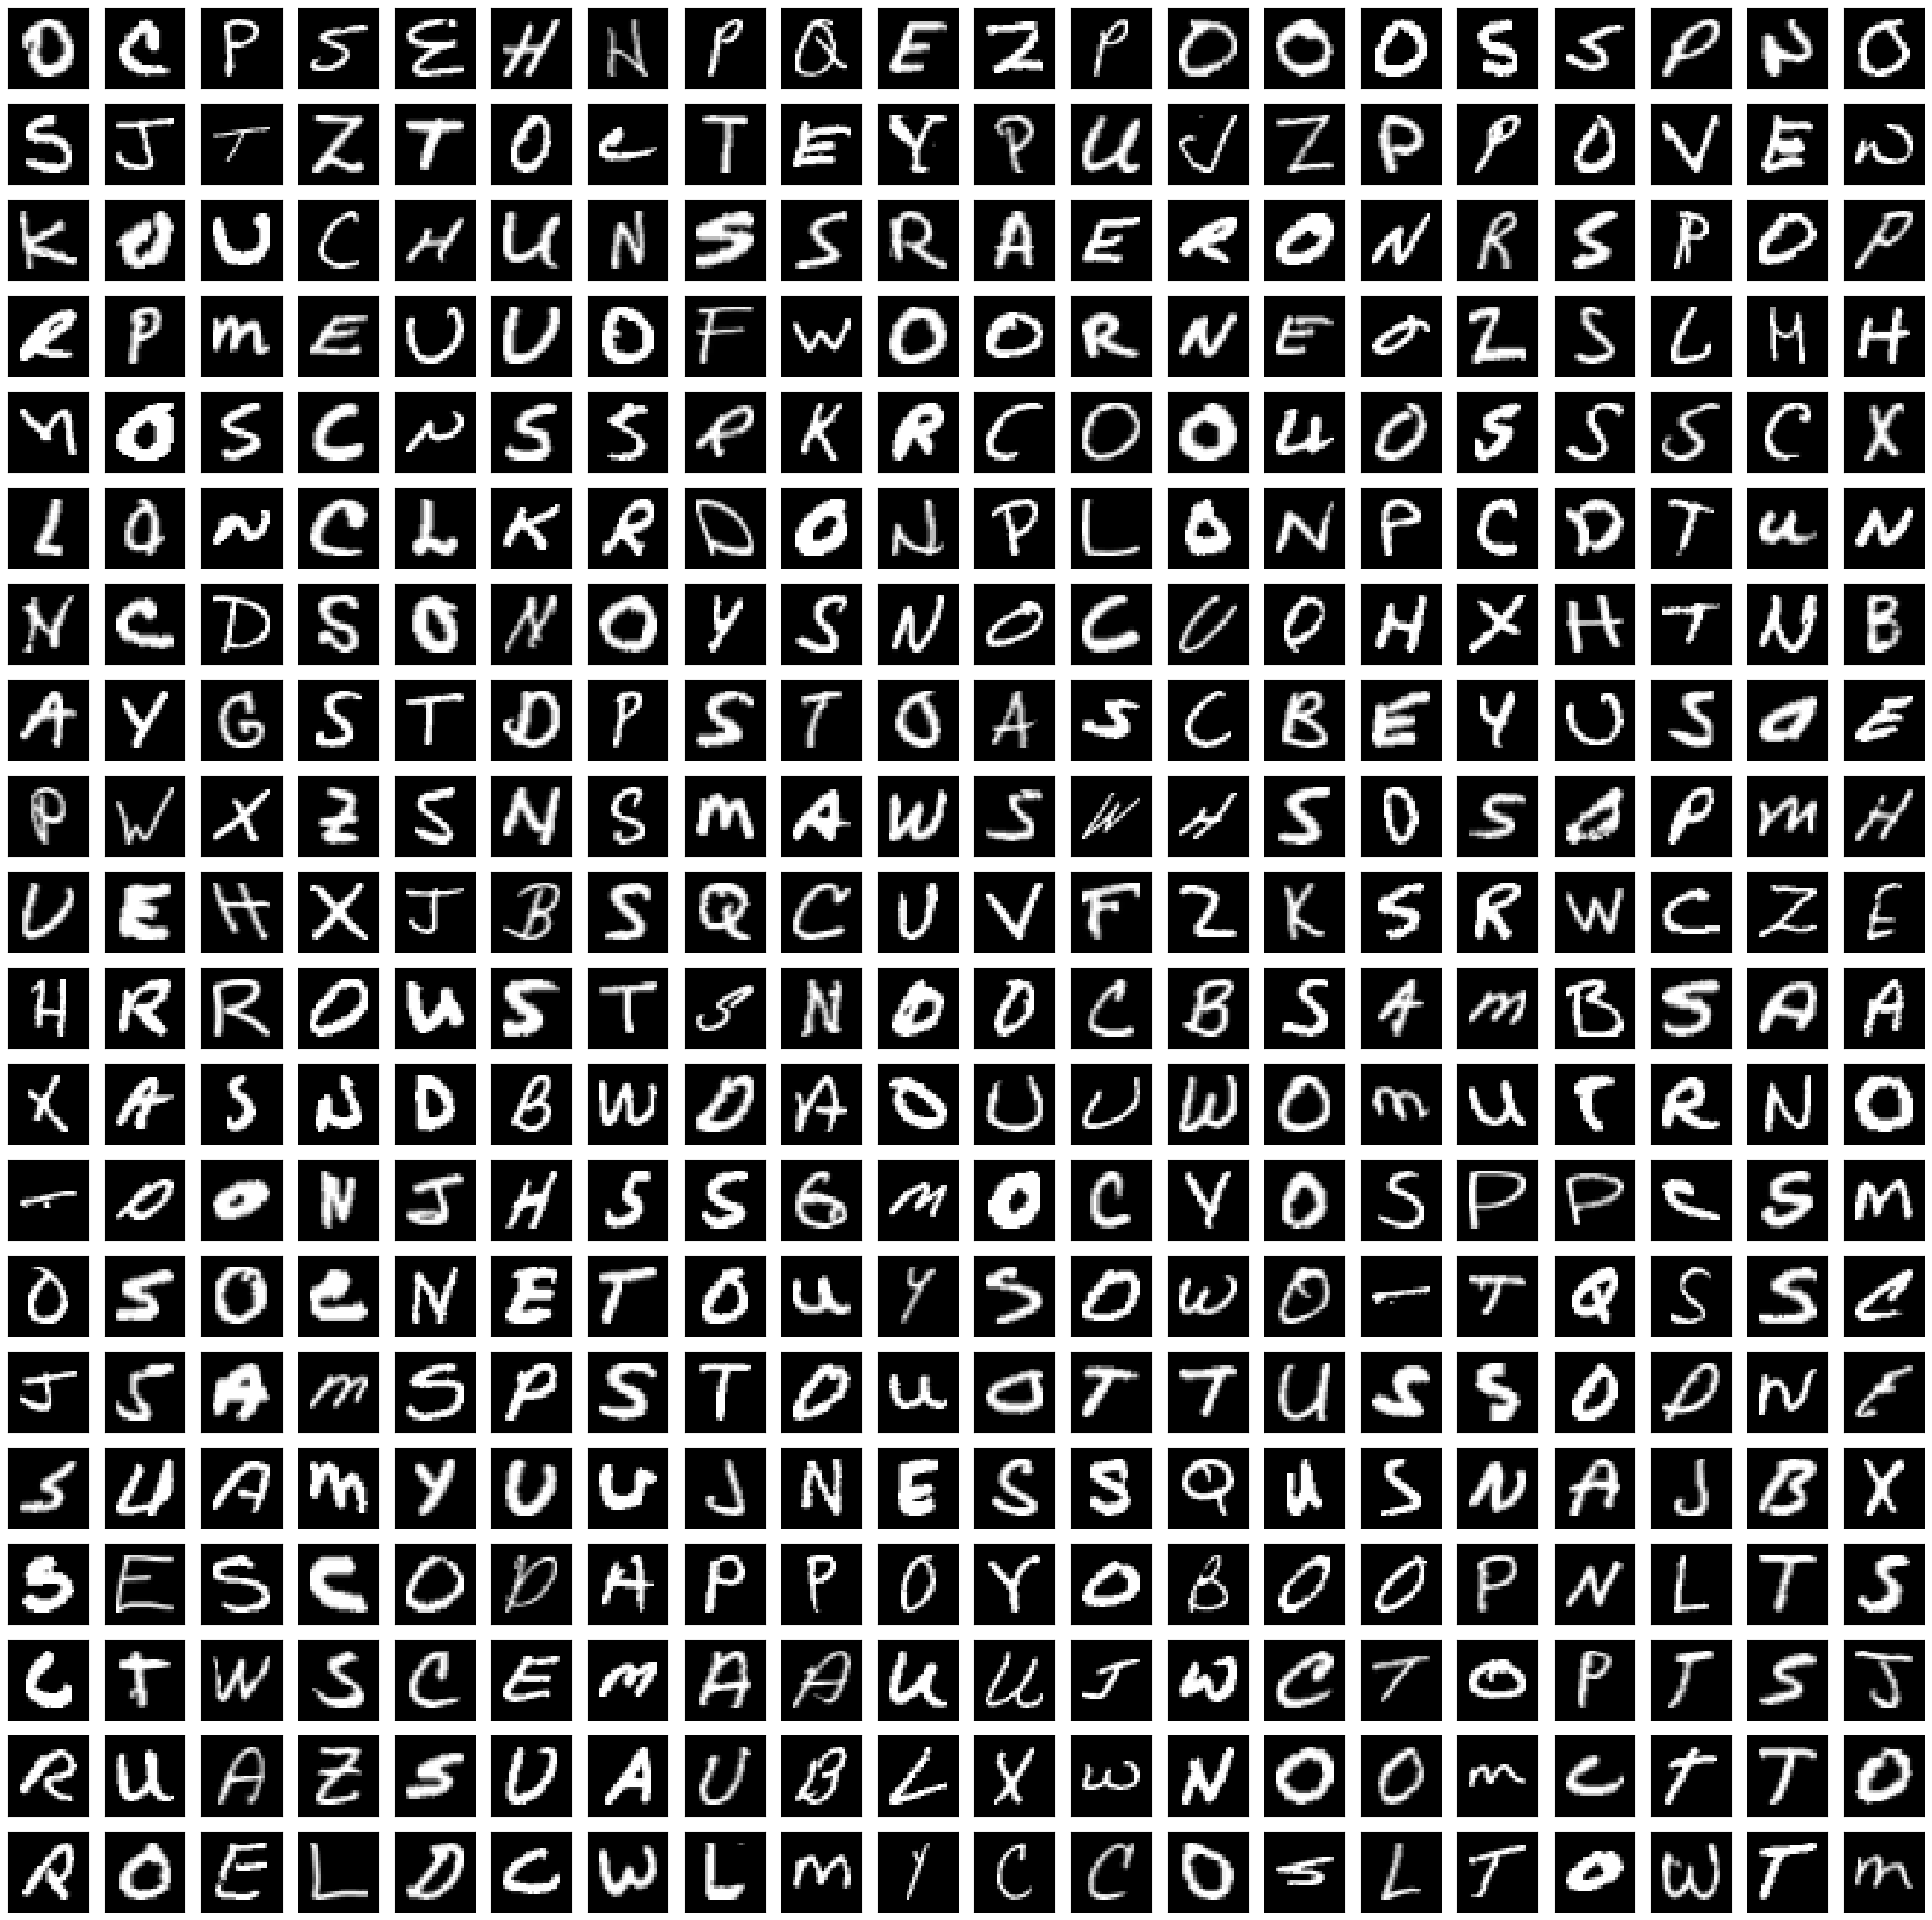

In [9]:
a=np.random.randint(low=0,high=372449,size=400)
fig=plt.figure(figsize=(30,30))
c=1
for i in a:
    fig.add_subplot(20,20,c)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x[i],cmap='gray')
    c+=1
del a    

In [10]:
del c, list_alpha, counts, unique

# Training and Testing Split

In [11]:
from sklearn.model_selection import train_test_split as tts

In [12]:
x=x.reshape(372450,28,28,1)
x_train,x_test,y_train,y_test = tts(x,labels,test_size=0.01)
del x  # memory issues
del labels
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(368725, 28, 28, 1)
(3725, 28, 28, 1)
(368725,)
(3725,)


# Model Building

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization, Input
from keras.optimizers import SGD

In [14]:
model = Sequential([
    Input(shape=(28, 28, 1)),  # Recommended way to define input shape
    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(100, activation='relu', kernel_initializer='he_uniform'),
    Dropout(0.1),
    Dense(64, activation='relu', kernel_initializer='he_uniform'),
    Dropout(0.125),
    BatchNormalization(),
    Dense(26, activation='softmax')  # 26 output classes for A-Z
])

# Compile the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    metrics=['accuracy']
)

# Show the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 26)                  │           1,690 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 471,294 (1.80 MB)

 Trainable params: 471,038 (1.80 MB)

 Non-trainable params: 256 (1.00 KB)

In [15]:
history = model.fit(x=x_train,y=y_train,validation_split=0.1,epochs=5)

Epoch 1/5
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 418s 39ms/step - accuracy: 0.8979 - loss: 0.3645 - val_accuracy: 0.9841 - val_loss: 0.0562
Epoch 2/5
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 410s 40ms/step - accuracy: 0.9795 - loss: 0.0757 - val_accuracy: 0.9879 - val_loss: 0.0464
Epoch 3/5
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 406s 39ms/step - accuracy: 0.9845 - loss: 0.0564 - val_accuracy: 0.9890 - val_loss: 0.0393
Epoch 4/5
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 408s 39ms/step - accuracy: 0.9877 - loss: 0.0447 - val_accuracy: 0.9909 - val_loss: 0.0339
Epoch 5/5
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 410s 40ms/step - accuracy: 0.9895 - loss: 0.0376 - val_accuracy: 0.9909 - val_loss: 0.0317


In [16]:
val_loss=history.history['val_loss']
val_accuracy=history.history['val_accuracy']
loss=history.history['loss']
accuracy=history.history['accuracy']

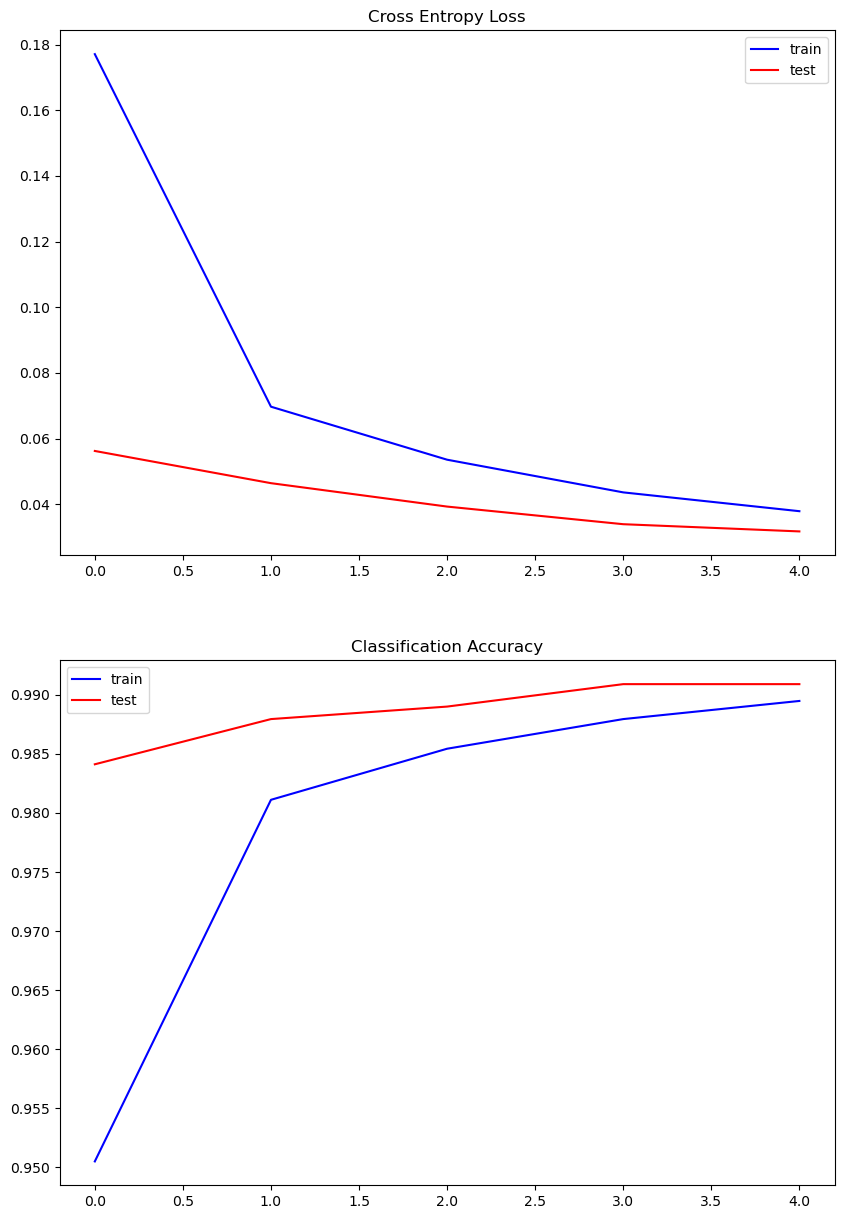

In [17]:
fig=plt.figure(figsize=(10,15))
fig.add_subplot(2, 1, 1)
plt.title('Cross Entropy Loss')
plt.plot(loss, color='blue', label='train')
plt.plot(val_loss, color='red', label='test')
plt.legend()
# plot accuracy
fig.add_subplot(2, 1, 2)
plt.title('Classification Accuracy')
plt.plot(accuracy, color='blue', label='train')
plt.plot(val_accuracy, color='red', label='test')
plt.legend()

In [18]:
metrics=model.evaluate(x_test,y_test)
metrics
print("Test Acuracy is : {:.2f}".format(metrics[1]*100))
print("Test Loss is : {:.2f}".format(metrics[0]))

117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9911 - loss: 0.0281
Test Acuracy is : 99.17
Test Loss is : 0.03


In [19]:
model.save('Alphabet_Recognition.keras')

In [20]:
model=tf.keras.models.load_model('Alphabet_Recognition.keras')

In [21]:
metrics= model.evaluate(x_test,y_test)
print(metrics)
print("Test Acuracy is : {:.2f}".format(metrics[1]*100))
print("Test Loss is : {:.2f}".format(metrics[0]))

117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9911 - loss: 0.0281  
[0.027194662019610405, 0.9916778802871704]
Test Acuracy is : 99.17
Test Loss is : 0.03


# Evaluating On Test Dataset

In [22]:
def test_images(n=225):
    index=np.random.randint(low=0,high=3720,size=n)
    fig=plt.figure(figsize=(30,40))
    for i in range(n):
        [pred]=model.predict(x_test[index[i]].reshape(1,28,28,1))
        pred=np.argmax(pred)
        actual=y_test[index[i]]
        fig.add_subplot(15,15,i+1)
        plt.xticks([])
        plt.yticks([])
        if actual==pred:
            plt.title(alpha[pred],color='green',fontsize=25,fontweight="bold")
        else:
            plt.title(alpha[pred],color='red',fontsize=25,fontweight="bold")
        plt.imshow(x_test[index[i]].reshape(28,28),cmap='gray')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━

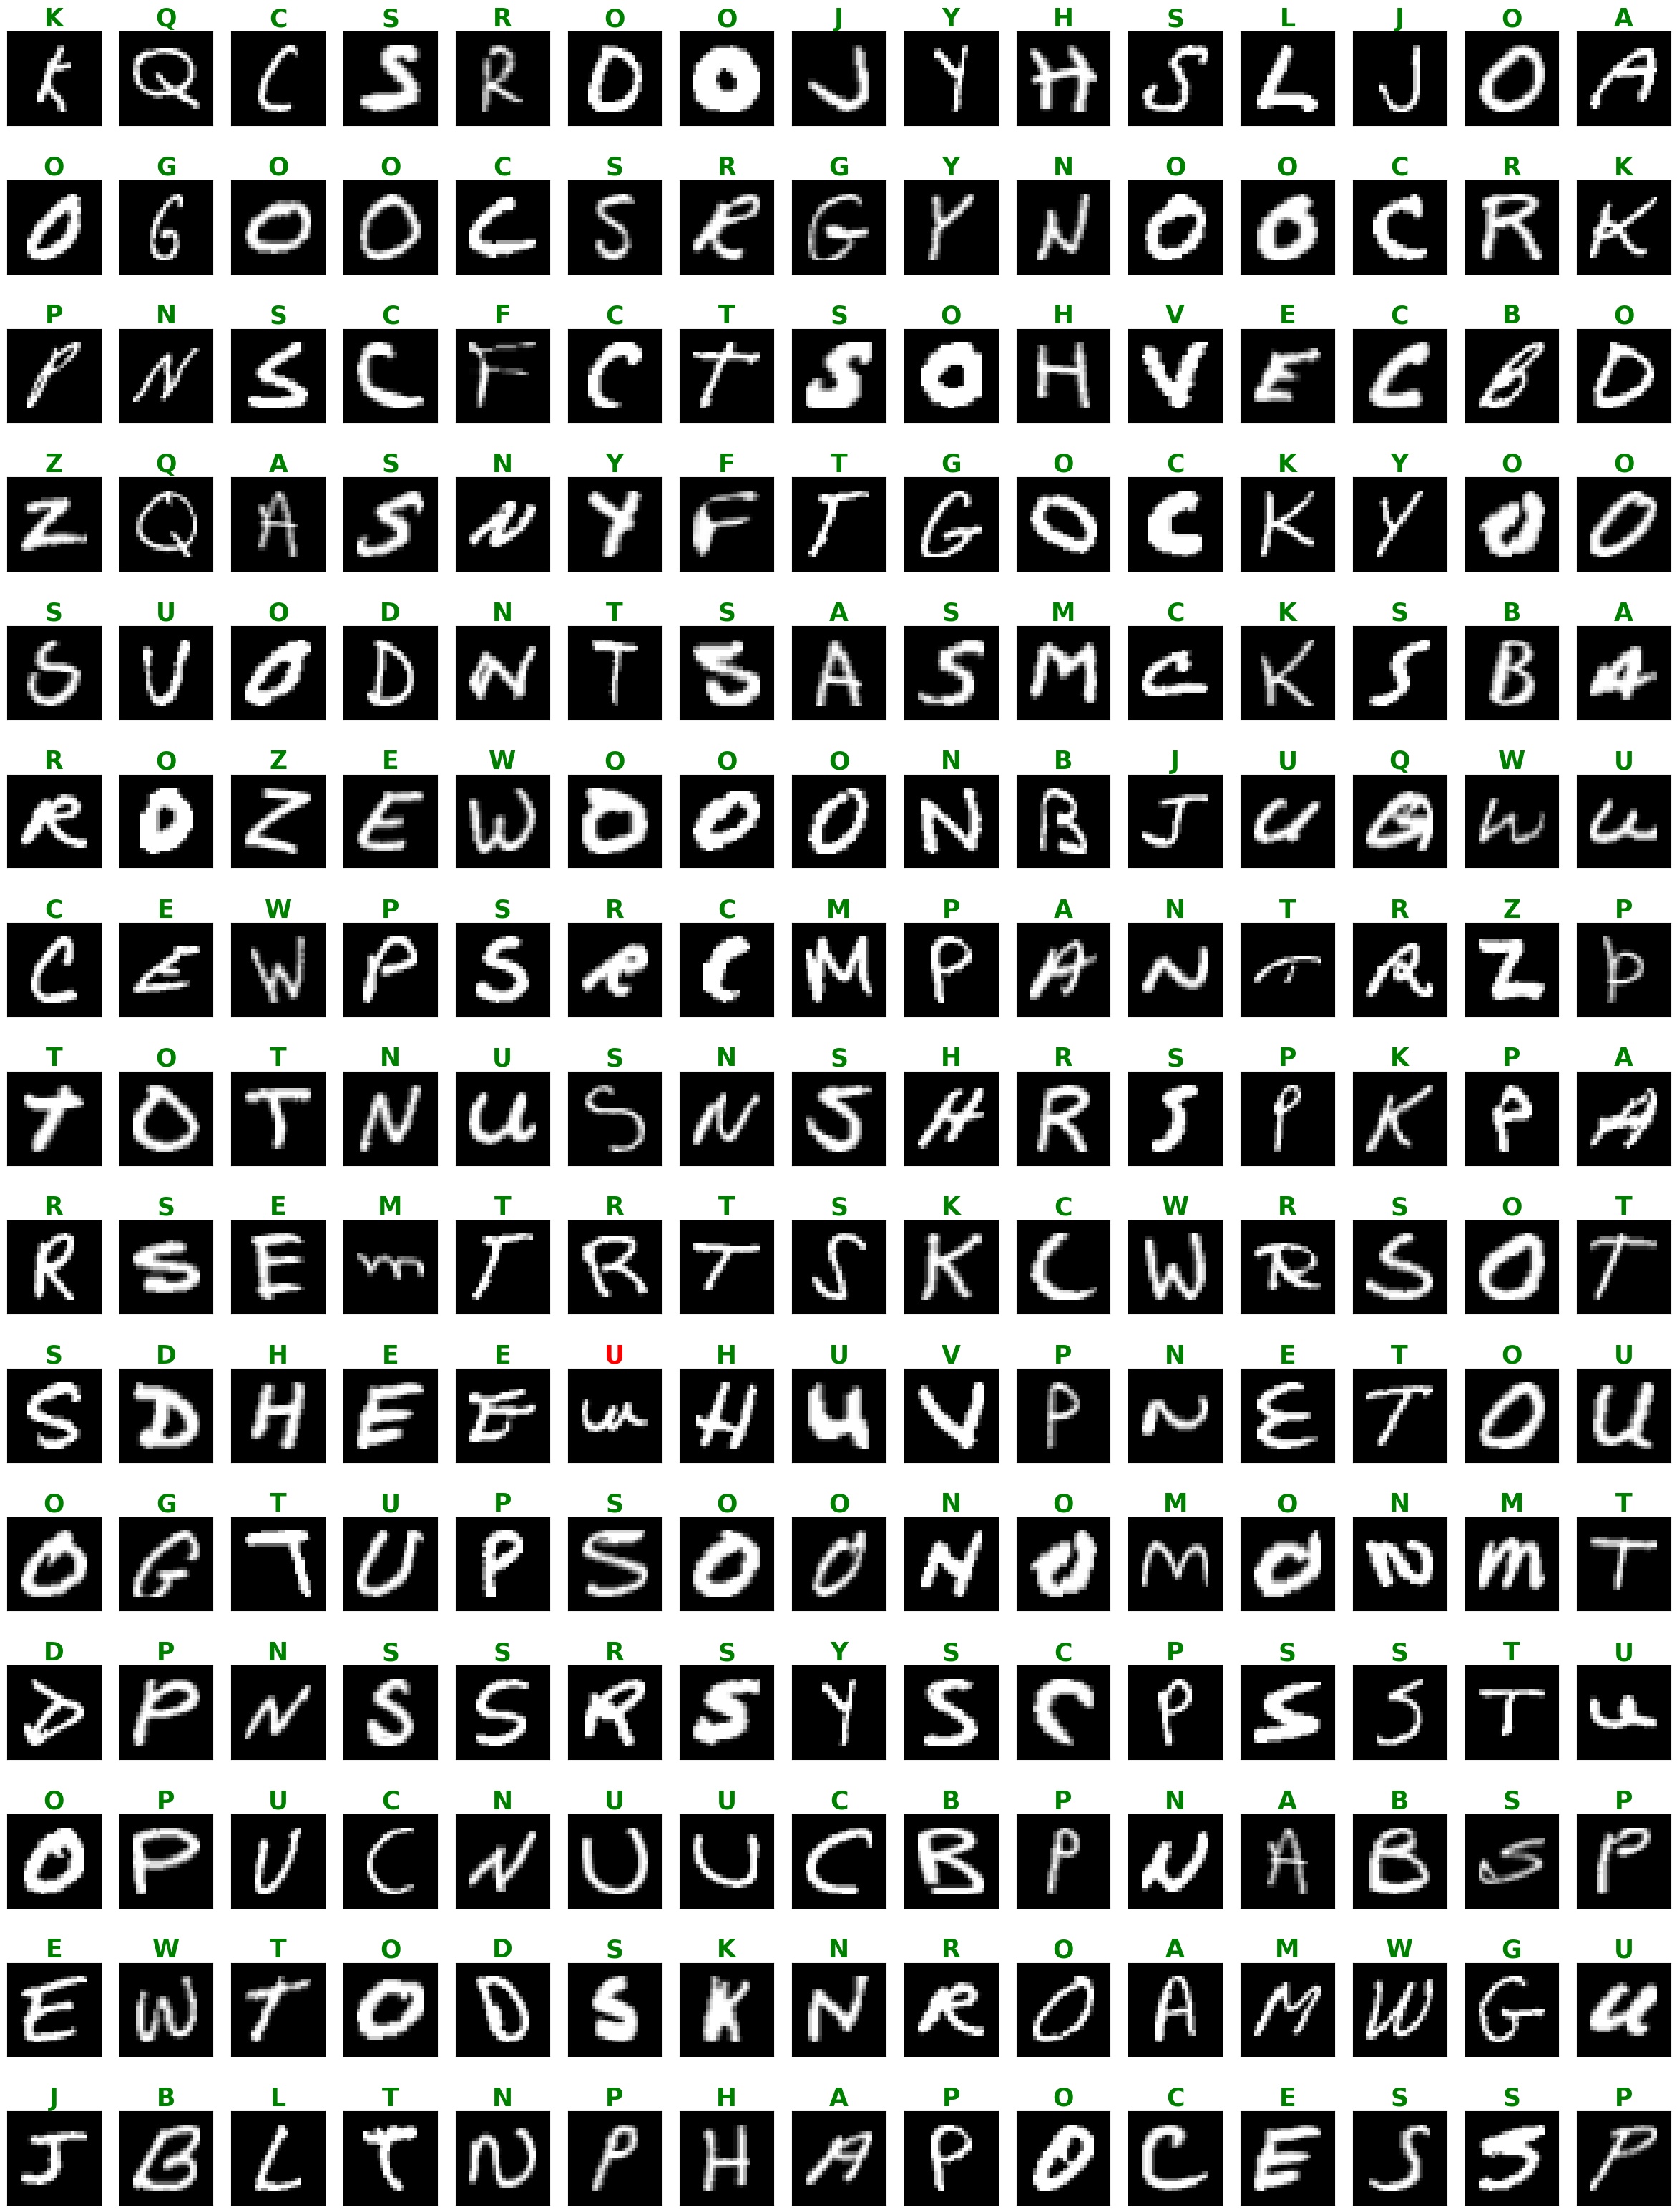

In [23]:
test_images()

# Test your Image

In [24]:
import cv2

In [25]:
alpha = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

alpha = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

def alphabet_recognize(filepath):
    # Load and preprocess the image
    image = cv2.imread(filepath)
    blur_image = cv2.medianBlur(image, 7)
    grey = cv2.cvtColor(blur_image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(grey, 200, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 41, 25)

    # Detect contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    preprocessed_digits = []
    coords = []

    # Sort contours from left to right
    boundingBoxes = [cv2.boundingRect(c) for c in contours]
    (contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes), key=lambda b: b[1][0]))

    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        coords.append(x)

        # Draw rectangle for visualization
        cv2.rectangle(blur_image, (x, y), (x + w, y + h), color=(255, 0, 0), thickness=2)

        digit = thresh[y:y + h, x:x + w]
        resized_digit = cv2.resize(digit, (18, 18))
        padded_digit = np.pad(resized_digit, ((5, 5), (5, 5)), "constant", constant_values=0)
        preprocessed_digits.append(padded_digit)

    # Predict letters with X-coordinates
    alphabets = []
    for i, digit in enumerate(preprocessed_digits):
        [prediction] = model.predict(digit.reshape(1, 28, 28, 1) / 255.)
        pred = alpha[np.argmax(prediction)]
        alphabets.append((coords[i], pred))

    # Sort by X position
    alphabets.sort(key=lambda tup: tup[0])

    # Compute average gap for adaptive spacing
    gaps = [alphabets[i + 1][0] - alphabets[i][0] for i in range(len(alphabets) - 1)]
    avg_gap = np.mean(gaps) if gaps else 0

    # Build the final text
    final_text = ''
    for i in range(len(alphabets)):
        final_text += alphabets[i][1]
        if i < len(alphabets) - 1:
            gap = alphabets[i + 1][0] - alphabets[i][0]
            if gap > avg_gap * 1.6:  # Adaptive space threshold
                final_text += ' '
                # print(f"Space added between {alphabets[i][1]} and {alphabets[i+1][1]} with gap {gap}")

    print("\n✅ The Recognized Text is:", final_text)

    # Optional: Show contoured image
    plt.xticks([]), plt.yticks([]), plt.title("Contoured Input Image")
    plt.imshow(blur_image[:, :, ::-1])  # BGR to RGB
    plt.show()

    # Optional: Show each letter separately
    figr = plt.figure(figsize=(len(preprocessed_digits), 4))
    for i, (x, letter) in enumerate(alphabets):
        figr.add_subplot(1, len(preprocessed_digits), i + 1)
        plt.xticks([]), plt.yticks([])
        plt.imshow(preprocessed_digits[i].reshape(28, 28), cmap="gray")
        plt.title(letter, color='green', fontsize=18, fontweight="bold")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

✅ The Recognized Text is: HELLO


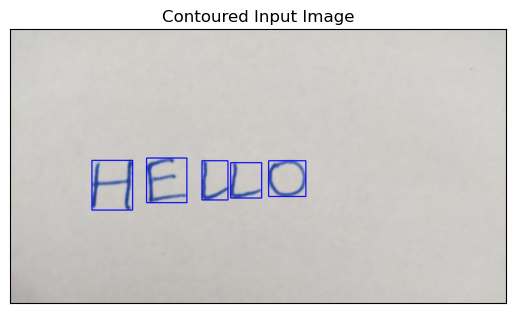

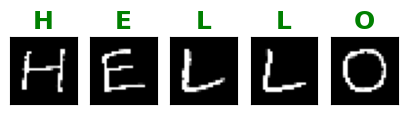

In [34]:
alphabet_recognize("C:/Users/murta/Desktop/New folder/Handwritten-Alphabets-Recognition/1.jpg")

In [1]:
alphabet_recognize("C:/Users/murta/Desktop/New folder/Handwritten-Alphabets-Recognition/2.jpg")

NameError: name 'alphabet_recognize' is not defined

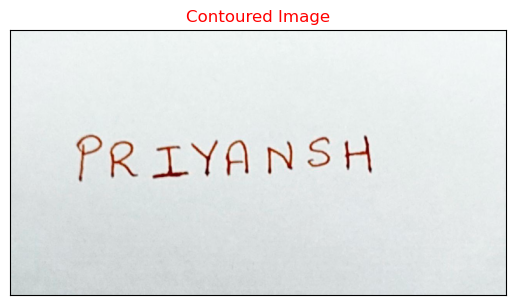

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
The Recognized Text is: P R I Y A N S H


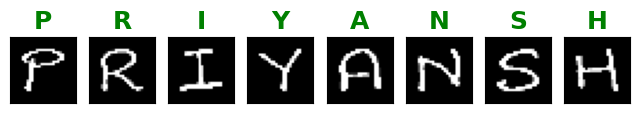

In [29]:
alphabet_recognize("C:/Users/murta/Desktop/New folder/Handwritten-Alphabets-Recognition/3.jpg")

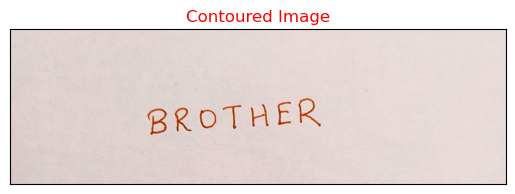

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The Recognized Text is: B R O T H E R


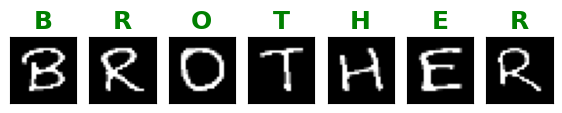

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\median_blur.dispatch.cpp:283: error: (-215:Assertion failed) !_src0.empty() in function 'cv::medianBlur'


In [ ]:
print("✅ All cells ran successfully.")